In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain,LabelPowerset
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
data=r'C:\Users\webhelp\Documents\petdataset\Dataset'

In [3]:
train_data=pd.read_csv(os.path.join(data,'train.csv'))
test_data=pd.read_csv(os.path.join(data,'test.csv'))

In [4]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
train_data.isnull().sum()

pet_id               0
issue_date           0
listing_date         0
condition         1477
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
breed_category       0
pet_category         0
dtype: int64

In [6]:
test_data.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition       619
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
dtype: int64

C:\Users\webhelp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\webhelp\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6281.,    0.,    0.,    0.,    0., 6819.,    0.,    0.,    0.,
        4257.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

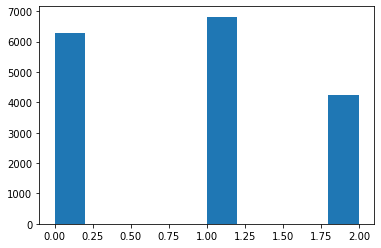

In [7]:
plt.hist(train_data['condition'])

In [8]:
train_data['condition'].value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

In [9]:
train_data['condition']=train_data['condition'].fillna(train_data['condition'].mode()[0])
test_data['condition']=test_data['condition'].fillna(test_data['condition'].mode()[0])

In [10]:
train_data.isnull().sum()

pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
dtype: int64

In [11]:
test_data.isnull().sum()

pet_id          0
issue_date      0
listing_date    0
condition       0
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
dtype: int64

In [12]:
train_data['color_type'].nunique()

56

In [13]:
test_data['color_type'].nunique()

54

In [14]:
color_data=train_data['color_type'].value_counts().to_dict()

In [15]:
train_data['color_type']=train_data['color_type'].map(color_data)
test_data['color_type']=test_data['color_type'].map(color_data)

In [16]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,1687,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,2453,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,1.0,1791,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,2453,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,4620,0.50,11.06,18,4,0.0,1


In [17]:
train_data=train_data.drop(['pet_id','issue_date','listing_date'],axis=1)
test_data=test_data.drop(['pet_id','issue_date','listing_date'],axis=1)

In [18]:
train_data['breed_category'].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [19]:
train_data['pet_category'].value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [20]:
X_train=train_data[['condition','color_type','length(m)','height(cm)','X1','X2']]
y_train=train_data[['breed_category','pet_category']]

In [21]:
X_train.describe()

,condition,color_type,length(m),height(cm),X1,X2
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.892535,2025.921525,0.502636,27.448832,5.369598,4.577307
std,0.740270,1642.236246,0.288705,13.019781,6.572366,3.517763
min,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,496.000000,0.250000,16.172500,0.000000,1.000000
50%,1.000000,1687.000000,0.500000,27.340000,0.000000,4.000000
75%,1.000000,2453.000000,0.760000,38.890000,13.000000,9.000000
max,2.000000,4620.000000,1.000000,50.000000,19.000000,9.000000


In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(test_data)

In [23]:
train_X,test_X,train_y,test_y=train_test_split(X_train,y_train,test_size=0.20,random_state=128)

Logistic regression

In [24]:
binary_relevance=BinaryRelevance(LogisticRegression())

In [25]:
binary_relevance.fit(train_X,train_y)

C:\Users\webhelp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\webhelp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\webhelp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\webhelp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='warn', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='warn', tol=0.0001,
                                              verbose=0, warm_start=False),
                require_dense=[True, True])

In [26]:
predictions_test_X=binary_relevance.predict(test_X).toarray()

In [27]:
test_y['breed_category'].value_counts()

0.0    1751
1.0    1724
2.0     292
Name: breed_category, dtype: int64

In [28]:
test_y['pet_category'].value_counts()

2    2127
1    1438
4     186
0      16
Name: pet_category, dtype: int64

In [29]:
test_y=np.array(test_y)

In [30]:
test_y.shape

(3767, 2)

In [31]:
predictions_test_X.shape

(3767, 2)

In [32]:
np.sum(np.not_equal(test_y,predictions_test_X))/float(test_y.size)

0.29001858242633394

In [33]:
confusion_matrix(test_y[:, 0],predictions_test_X[:, 0])

array([[1518,  222,   11],
       [ 416, 1308,    0],
       [  42,  188,   62]], dtype=int64)

In [34]:
confusion_matrix(test_y[:, 1],predictions_test_X[:, 1])

array([[   0,    3,   13,    0],
       [   0,  736,  702,    0],
       [   0,  402, 1725,    0],
       [   0,  143,   43,    0]], dtype=int64)

In [35]:
def submission(model,test_data,filename):
    try:
        predictions=model.predict(test_data).toarray()
    except:
        predictions=model.predict(test_data)
    load_test_data=pd.read_csv(os.path.join(data,'test.csv'))
    submissions=pd.DataFrame({'pet_id':load_test_data['pet_id'],'breed_category':predictions[:,0],'pet_category':predictions[:,1].astype(np.int32)})
    submissions.to_csv(filename + '.csv',index=False)

In [36]:
submission(binary_relevance,X_test,'binary_relevance')

RANDOM FOREST CLASSIFIER

In [176]:
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=0, warm_start=False)

In [177]:
random_forest.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [178]:
predictions_test_X=random_forest.predict(test_X)

In [179]:
np.sum(np.not_equal(test_y,predictions_test_X))/float(test_y.size)

0.15675603928855852

In [180]:
confusion_matrix(test_y[:, 0],predictions_test_X[:, 0])

array([[1562,  155,   34],
       [ 227, 1497,    0],
       [ 120,    0,  172]], dtype=int64)

In [181]:
confusion_matrix(test_y[:, 1],predictions_test_X[:, 1])

array([[   0,    4,   10,    2],
       [   0, 1072,  362,    4],
       [   0,  204, 1918,    5],
       [   0,   14,   40,  132]], dtype=int64)

In [182]:
submission(random_forest,X_test,'random_forest_classifier_4')

Xgboost

In [407]:
clf_multilabel = MultiOutputClassifier(xgb.XGBClassifier(base_score=1.0, booster='gbtree',
                                              colsample_bylevel=0.99,
                                              colsample_bynode=0.99,
                                              colsample_bytree=0.99, gamma=1,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.40,
                                              max_delta_step=None,
                                              max_depth=3,
                                              min_child_weight=5,
                                              monotone_constraints=None,
                                              n_estimators=110, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='binary:logistic',
                                              random_state=None, reg_alpha=1,
                                              reg_lambda=1,
                                              scale_pos_weight=None,
                                              subsample=1, tree_method='hist',
                                              validate_parameters=None,
                                              verbosity=None,sampling_method='gradient_based'))

In [408]:
clf_multilabel.fit(X_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=1.0, booster='gbtree',
                                              colsample_bylevel=0.99,
                                              colsample_bynode=0.99,
                                              colsample_bytree=0.99, gamma=1,
                                              gpu_id=None,
                                              importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.4,
                                              max_delta_step=None, max_depth=3,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=110, n_jobs=None,
                                              num_parallel_tree=None,
                                              objectiv

In [409]:
predictions_test_X=clf_multilabel.predict(test_X)

In [410]:
np.sum(np.not_equal(test_y,predictions_test_X))/float(test_y.size)

0.11786567560392885

In [411]:
confusion_matrix(test_y[:, 0],predictions_test_X[:, 0])

array([[1622,  104,   25],
       [ 208, 1516,    0],
       [  93,    0,  199]], dtype=int64)

In [412]:
confusion_matrix(test_y[:, 1],predictions_test_X[:, 1])

array([[   0,    4,   10,    2],
       [   0, 1153,  282,    3],
       [   0,  107, 2015,    5],
       [   0,    6,   39,  141]], dtype=int64)

In [413]:
confusion_matrix(test_y[:, 1],predictions_test_X[:, 1])

array([[   0,    4,   10,    2],
       [   0, 1153,  282,    3],
       [   0,  107, 2015,    5],
       [   0,    6,   39,  141]], dtype=int64)

In [414]:
submission(clf_multilabel,X_test,'xgboost_classifier')